## Image compression

In [9]:
import Pkg
Pkg.add("Images")
Pkg.add("ImageMagick")
using Images, LinearAlgebra

 Resolving package versions...
  Updating `C:\Users\quf93\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\quf93\.julia\environments\v1.1\Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed ImageMagick ─ v0.7.5
  Updating `C:\Users\quf93\.julia\environments\v1.1\Project.toml`
  [6218d12a] + ImageMagick v0.7.5
  Updating `C:\Users\quf93\.julia\environments\v1.1\Manifest.toml`
  [6218d12a] + ImageMagick v0.7.5
  Building ImageMagick → `C:\Users\quf93\.julia\packages\ImageMagick\vMfoS\deps\build.log`


In [10]:
banana = load("images/banana.jpg")
size(banana)

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1186


(100, 100)

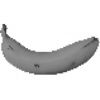

In [11]:
banana = Gray.(banana)

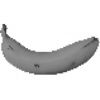

In [13]:
channelview(banana)
Gray.(channelview(banana))

## Singular Value Decomposition

$$ A = USV^T $$

In [14]:
function compress_image(image, factor)
    image = channelview(Gray.(image))
    image = svd(image)
    U, S, V = image.U, image.S, image.V
    number_singular = size(S)[1]
    d = fld(number_singular, factor) # largest integer less than or equal to x / y
    compressed_image = U[:, 1:d] * Diagonal(S[1:d]) * V[:, 1:d]'
    Gray.(compressed_image)
end

compress_image (generic function with 1 method)

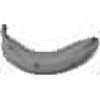

In [15]:
compress_image(banana, 10)

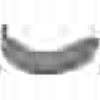

In [18]:
comp_image = compress_image(banana, 20)